<a href="https://colab.research.google.com/github/mdeepika12/AIML/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('churn_data_logistic2.csv')

In [4]:
df.head()

,Age,Marital,Default,Balance,Housing Loan,Personal Loan,Current Campaign,Churn
0,56,Divorced,1,36515,1,0,0,1
1,69,Divorced,0,87144,0,1,0,1
2,46,Divorced,1,25898,0,1,0,1
3,32,Married,0,-81,0,0,1,0
4,60,Married,0,48070,1,0,0,0


In [5]:
df.isnull().sum()

,0
Age,0
Marital,0
Default,0
Balance,0
Housing Loan,0
Personal Loan,0
Current Campaign,0
Churn,0


In [ ]:
# encode Marital
df['Marital'].value_counts()

,count
Marital,
Married,1829
Divorced,1817
Single,1774


In [ ]:
# encode Marital
df['Marital'] = df['Marital'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [ ]:
df.head()

,Age,Marital,Default,Balance,Housing Loan,Personal Loan,Current Campaign,Churn
0,56,2,1,36515,1,0,0,1
1,69,2,0,87144,0,1,0,1
2,46,2,1,25898,0,1,0,1
3,32,1,0,-81,0,0,1,0
4,60,1,0,48070,1,0,0,0


In [ ]:
df.describe()

,Age,Marital,Default,Balance,Housing Loan,Personal Loan,Current Campaign,Churn
count,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000
mean,48.770664,1.007934,0.490775,48158.407011,0.503321,0.512362,0.495941,0.353506
std,17.845402,0.814006,0.499961,29705.605312,0.500035,0.499893,0.500030,0.478102
min,18.000000,0.000000,0.000000,-1995.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,21810.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,0.000000,48170.000000,1.000000,1.000000,0.000000,0.000000
75%,64.000000,2.000000,1.000000,74014.500000,1.000000,1.000000,1.000000,1.000000
max,79.000000,2.000000,1.000000,99982.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes


,0
Age,int64
Marital,int64
Default,int64
Balance,int64
Housing Loan,int64
Personal Loan,int64
Current Campaign,int64
Churn,int64


<ipython-input-25-9a4075e35249>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_churn.index, y=marital_churn.values, palette='coolwarm')


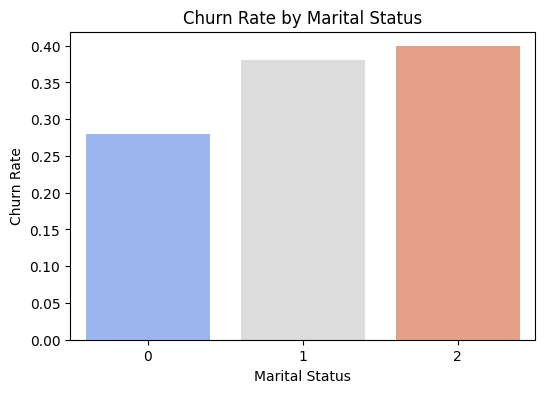

In [ ]:
# Calculate churn rate by marital status
marital_churn = df.groupby('Marital')['Churn'].mean()

# Visualize with a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=marital_churn.index, y=marital_churn.values, palette='coolwarm')
plt.title('Churn Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Churn Rate')
plt.show()

<ipython-input-31-0b5c678a157c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Balance', data=df, palette='Set2') # Pass df to data instead of a separate df argument


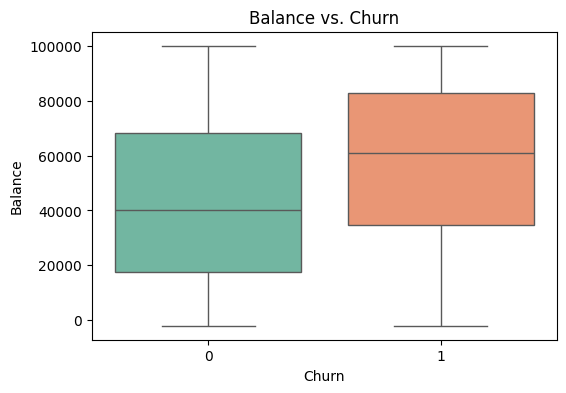

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Balance', data=df, palette='Set2') # Pass df to data instead of a separate df argument
plt.title('Balance vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

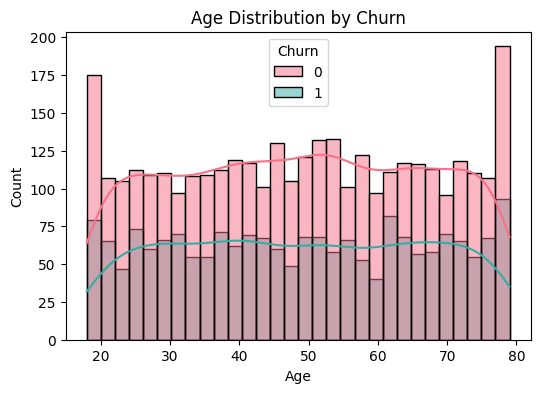

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df, x='Age', hue='Churn', kde=True, palette='husl', bins=30)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-33-d24bb6ea6605>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_churn.index, y=campaign_churn.values, palette='coolwarm')


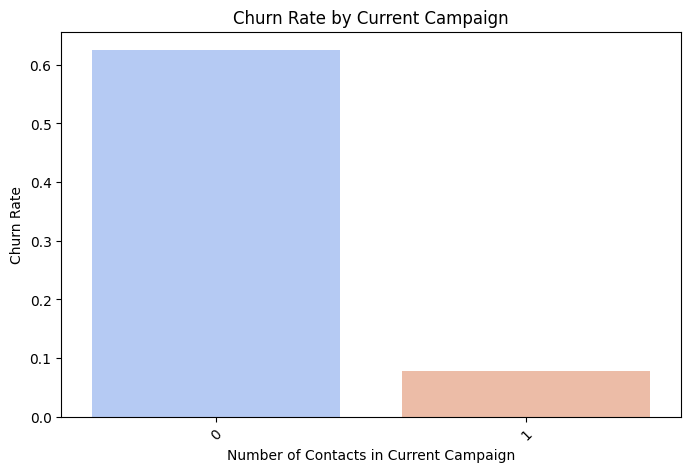

In [ ]:
# Calculate churn rate by Current Campaign
campaign_churn = df.groupby('Current Campaign')['Churn'].mean()

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.barplot(x=campaign_churn.index, y=campaign_churn.values, palette='coolwarm')
plt.title('Churn Rate by Current Campaign')
plt.xlabel('Number of Contacts in Current Campaign')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-f8187f622574>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_loan_churn.index, y=housing_loan_churn.values, palette='Blues')


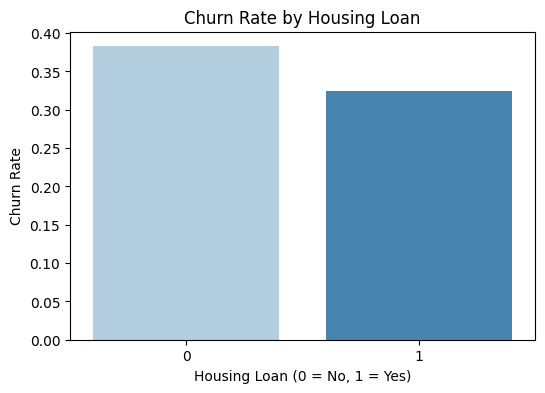

In [ ]:
# Calculate churn rate for Housing Loan
housing_loan_churn = df.groupby('Housing Loan')['Churn'].mean()

# Visualize the relationship
plt.figure(figsize=(6, 4))
sns.barplot(x=housing_loan_churn.index, y=housing_loan_churn.values, palette='Blues')
plt.title('Churn Rate by Housing Loan')
plt.xlabel('Housing Loan (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()


<ipython-input-39-0ff83a25eaf6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=personal_loan_churn.index, y=personal_loan_churn.values, palette='Greens')


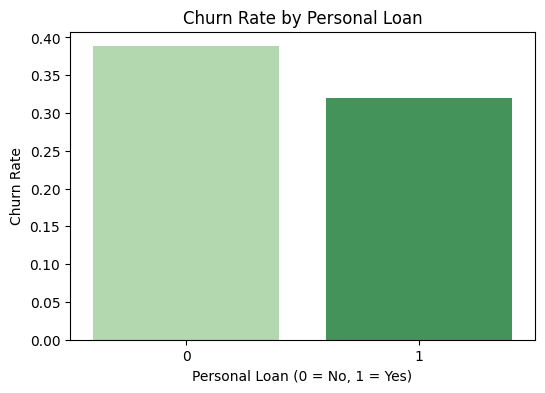

In [ ]:
# Calculate churn rate for Personal Loan
personal_loan_churn = df.groupby('Personal Loan')['Churn'].mean()

# Visualize the relationship
plt.figure(figsize=(6, 4))
sns.barplot(x=personal_loan_churn.index, y=personal_loan_churn.values, palette='Greens')
plt.title('Churn Rate by Personal Loan')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlation of all features with Churn
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_correlation)

Churn               1.000000
Default             0.273814
Balance             0.230580
Marital             0.101377
Age                -0.001548
Housing Loan       -0.060488
Personal Loan      -0.070791
Current Campaign   -0.572926
Name: Churn, dtype: float64


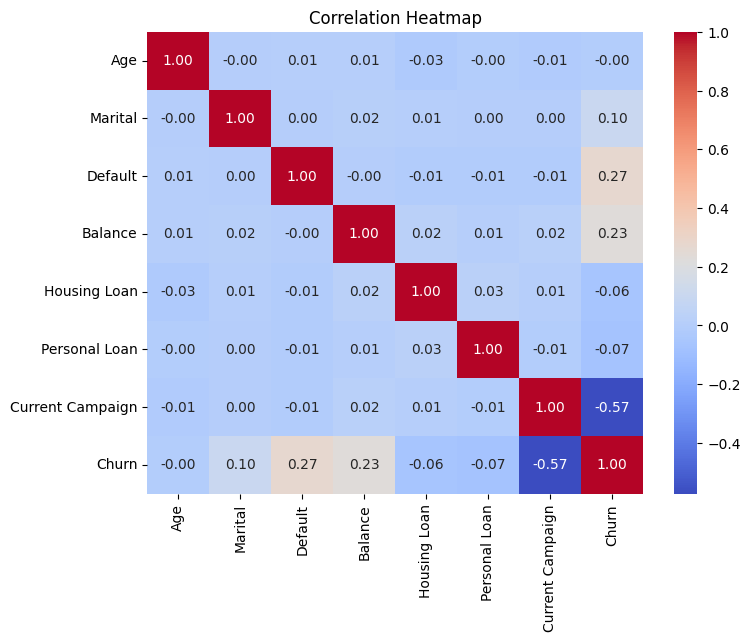

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-43-1b91e465f8a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_correlation_no_target.values, y=churn_correlation_no_target.index, palette='viridis')


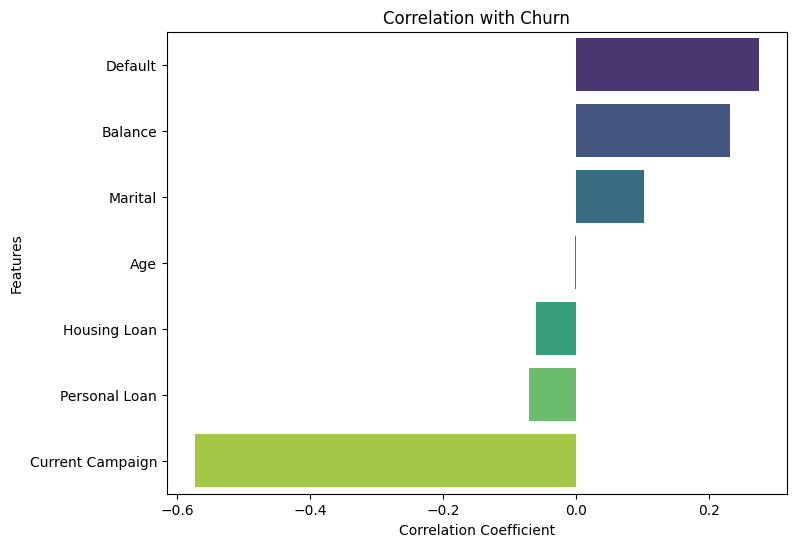

In [ ]:
# Exclude Churn itself from the correlation plot
churn_correlation_no_target = churn_correlation.drop('Churn')

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_correlation_no_target.values, y=churn_correlation_no_target.index, palette='viridis')
plt.title('Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

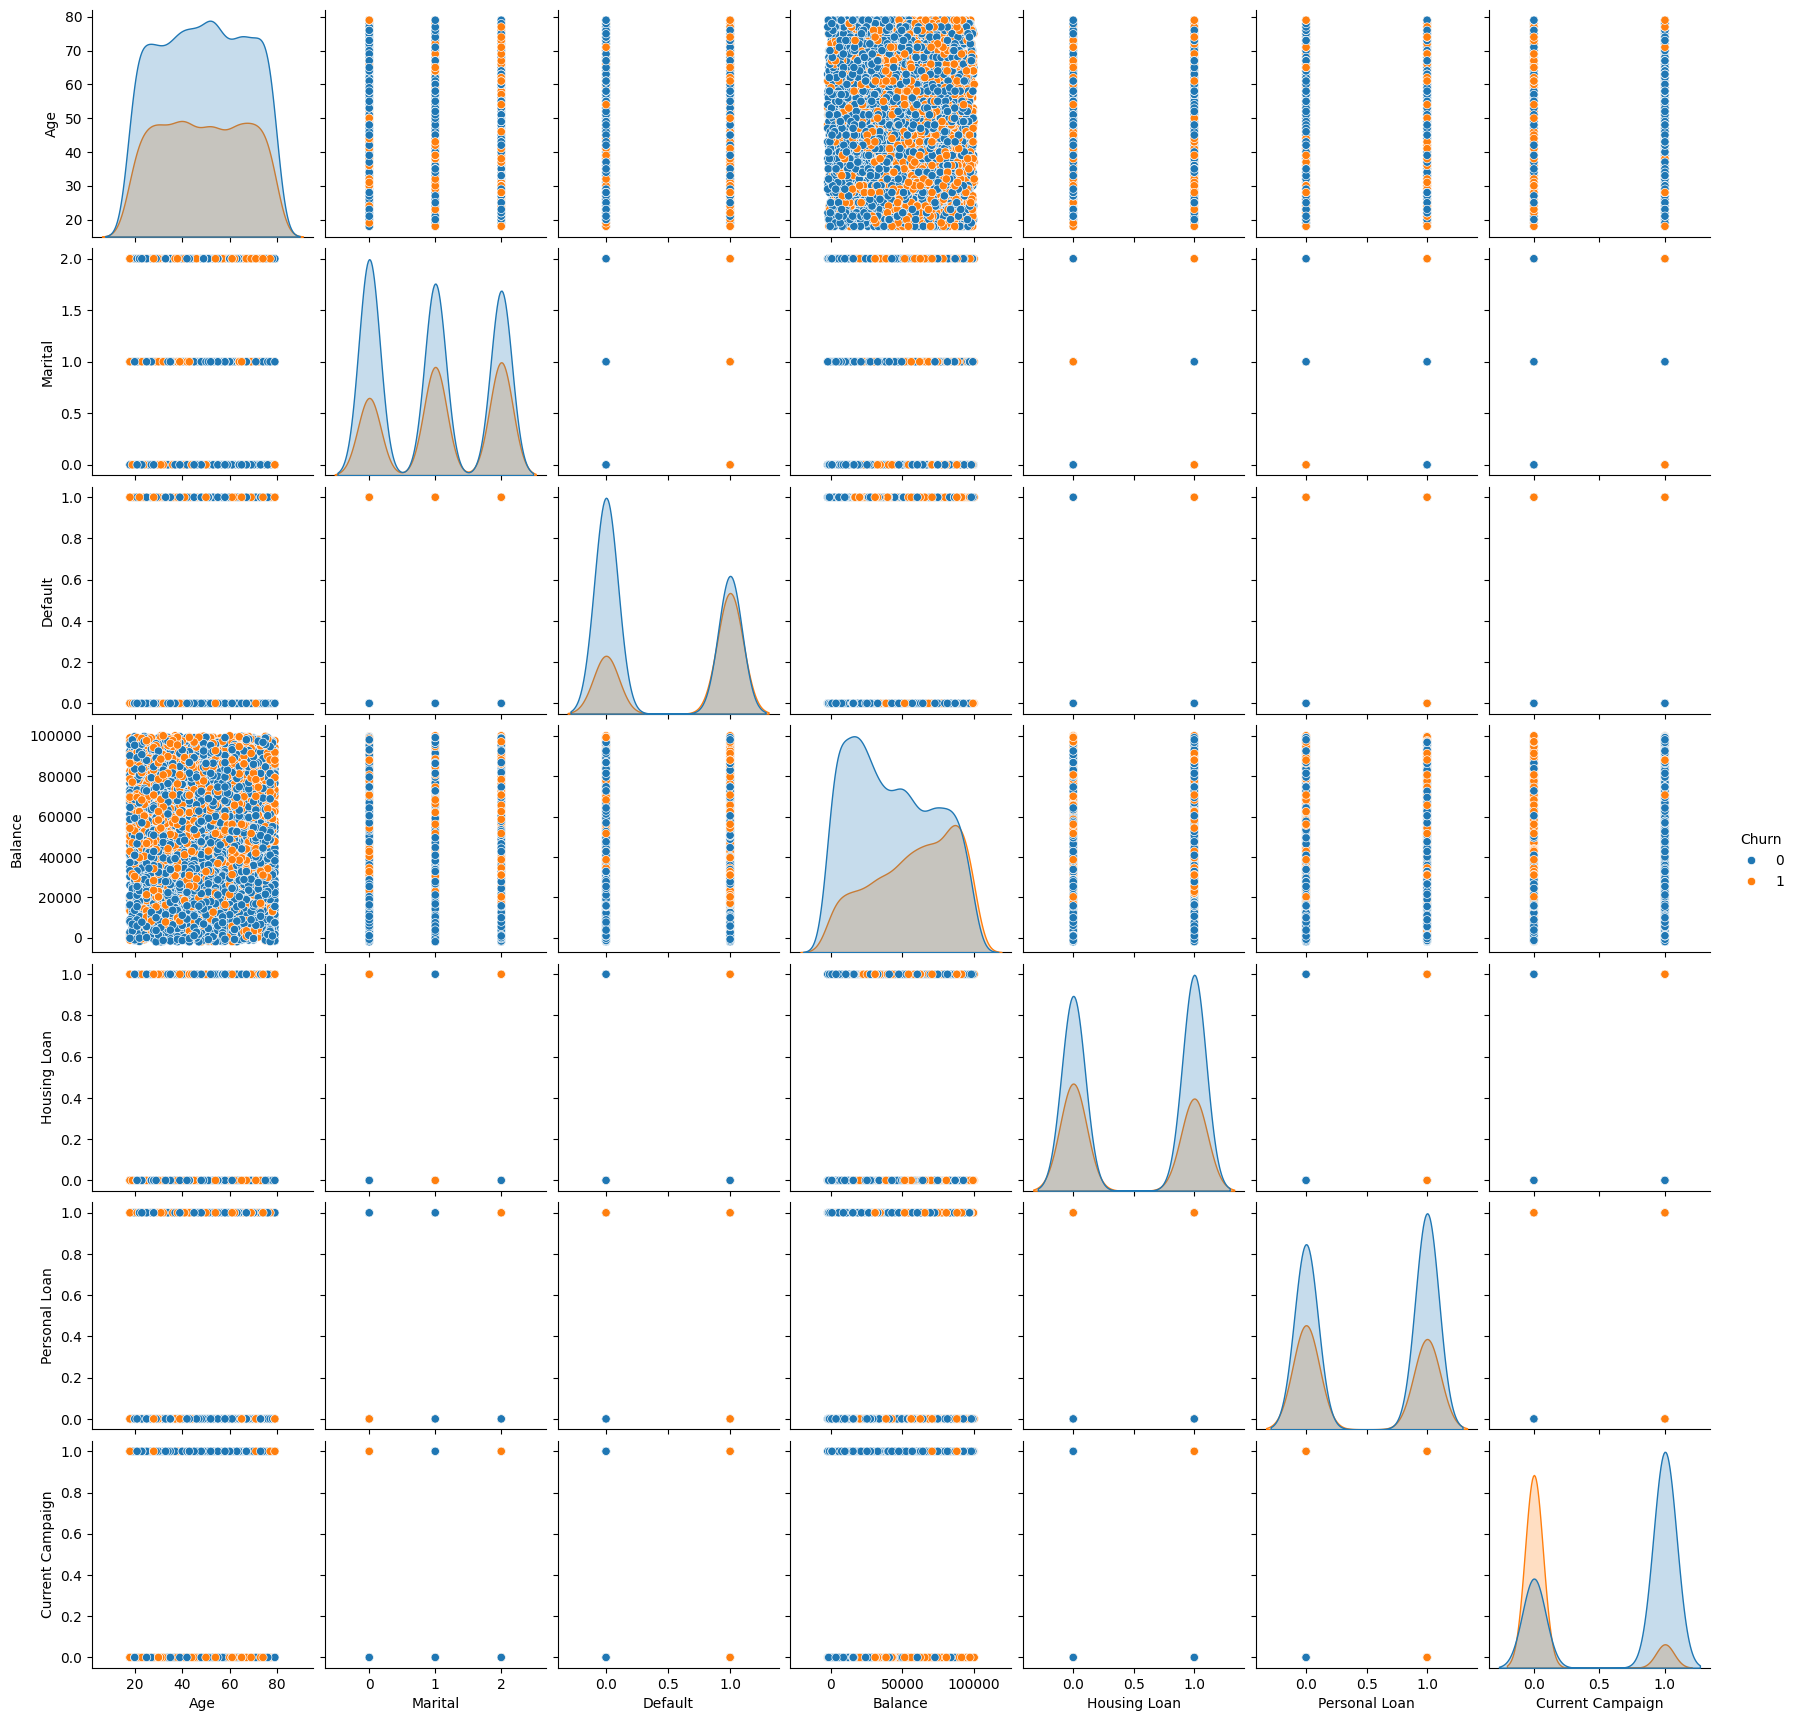

In [ ]:
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.show()

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [7]:
# Import necessary libraries (if not already imported)
import pandas as pd

# List of categorical columns to one-hot encode
categorical_cols = ['Marital', 'Default','Housing Loan', 'Personal Loan', 'Current Campaign']

# Perform one-hot encoding
df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the updated DataFrame
print(df_enc.head())

   Age  Balance  Churn  Marital_Married  Marital_Single  Default_1  \
0   56    36515      1            False           False       True   
1   69    87144      1            False           False      False   
2   46    25898      1            False           False       True   
3   32      -81      0             True           False      False   
4   60    48070      0             True           False      False   

   Housing Loan_1  Personal Loan_1  Current Campaign_1  
0            True            False               False  
1           False             True               False  
2           False             True               False  
3           False            False                True  
4            True            False               False  


In [8]:
# Define features and target variable
X = df_enc.drop('Churn', axis=1)
y = df_enc['Churn']

In [9]:
# Split the dataset into training and testing sets with 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
# Standardize continuous features (Age, Balance)
#scaler = StandardScaler()
#X_train[['age', 'balance']] = scaler.fit_transform(X_train[['age', 'balance']])
#X_test[['age', 'balance']] = scaler.transform(X_test[['age', 'balance']])
X_train.head()


,Age,Balance,Marital_Married,Marital_Single,Default_1,Housing Loan_1,Personal Loan_1,Current Campaign_1
4739,20,86529,False,True,True,True,False,False
3344,26,23444,False,True,False,True,True,False
4557,26,98290,False,True,True,False,True,True
5344,74,44413,False,False,False,True,True,True
3678,63,16242,False,False,True,True,False,True


In [10]:
# Assuming df_enc is your DataFrame after one-hot encoding

# Find boolean columns
boolean_cols = [col for col in df_enc.columns if pd.api.types.is_bool_dtype(df_enc[col])]

# Convert boolean columns to 0s and 1s
for col in boolean_cols:
    df_enc[col] = df_enc[col].astype(int)

# Display the first few rows of the updated DataFrame
print(df_enc.head())

   Age  Balance  Churn  Marital_Married  Marital_Single  Default_1  \
0   56    36515      1                0               0          1   
1   69    87144      1                0               0          0   
2   46    25898      1                0               0          1   
3   32      -81      0                1               0          0   
4   60    48070      0                1               0          0   

   Housing Loan_1  Personal Loan_1  Current Campaign_1  
0               1                0                   0  
1               0                1                   0  
2               0                1                   0  
3               0                0                   1  
4               1                0                   0  


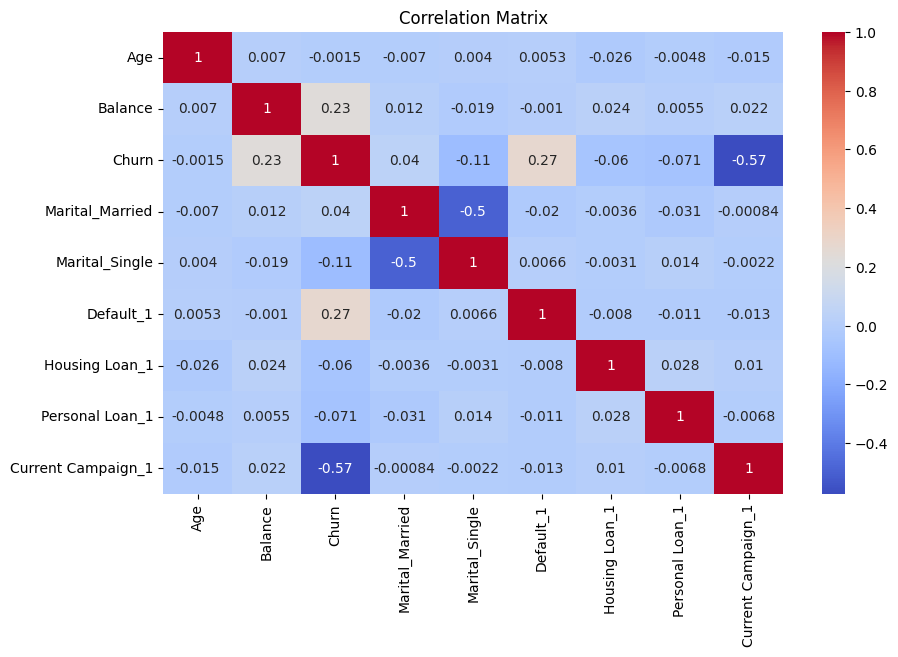

In [11]:
# Data Visualization
# Visualizing the relationship between features and churn
plt.figure(figsize=(10, 6))
sns.heatmap(df_enc.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

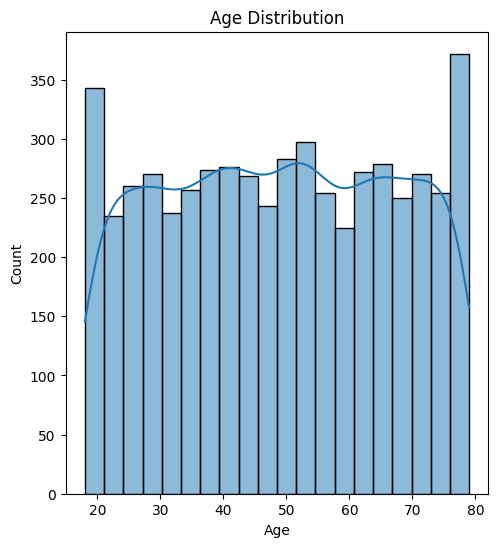

In [12]:
# Plot distribution of age and balance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=24)

# Fit the model to the training data (using the selected features)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

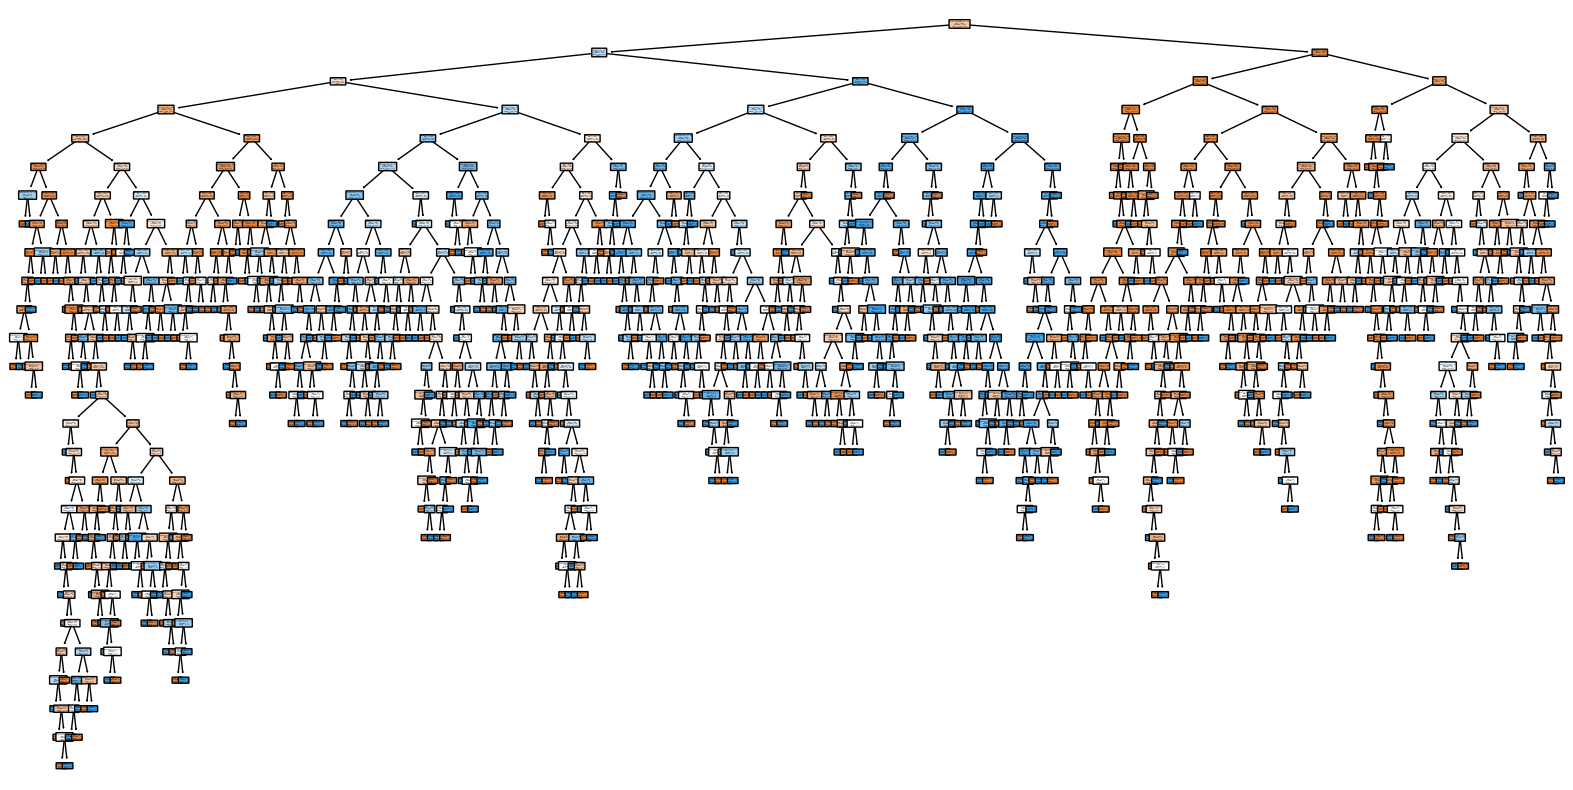

In [14]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


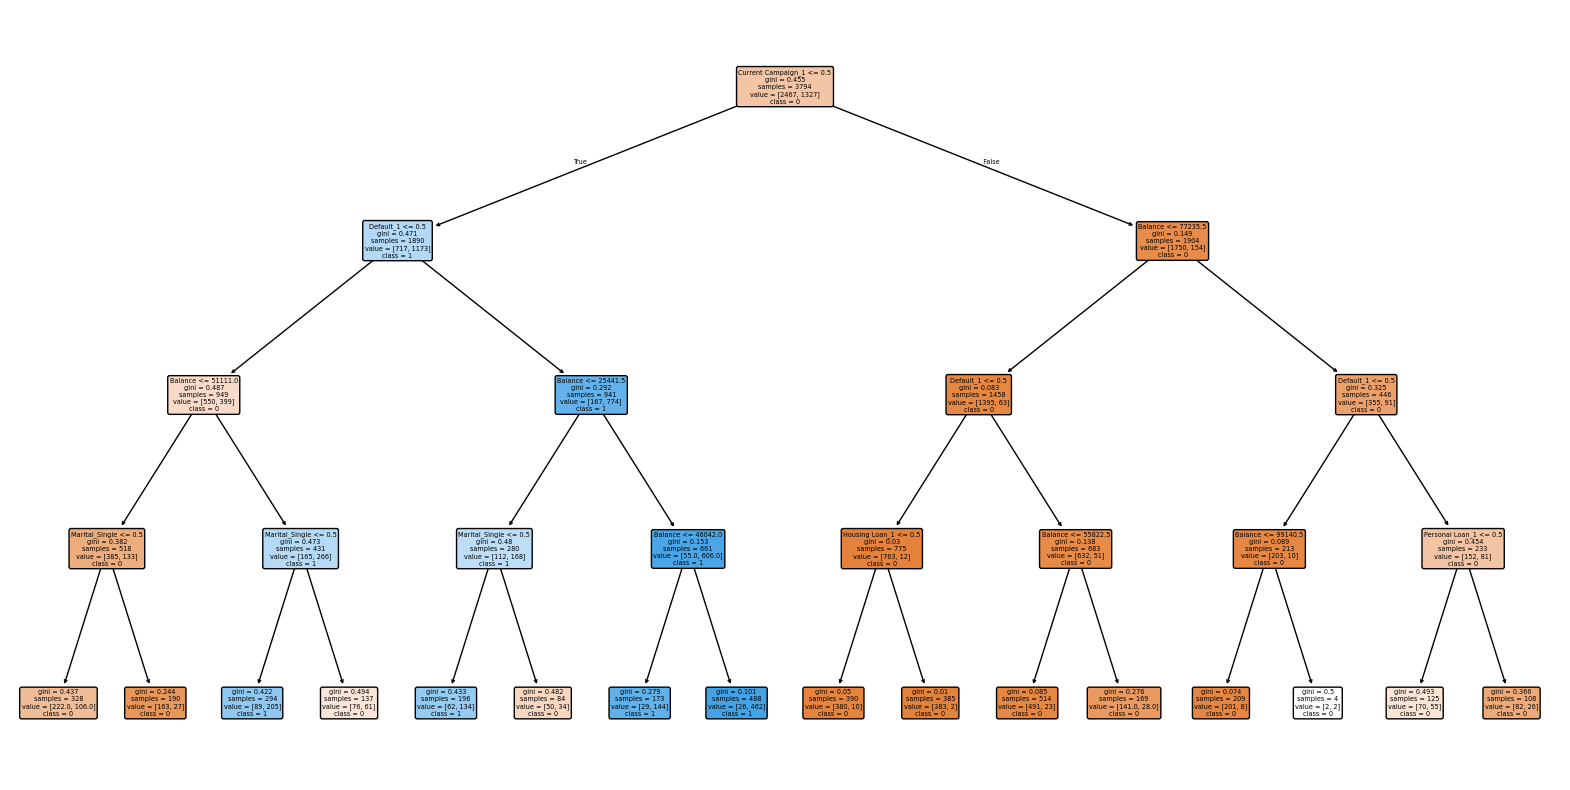

In [15]:
# Initialize the CART model with max_depth=4
cart_model = DecisionTreeClassifier(max_depth=4, random_state=24)

# Fit the model to the training data
cart_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


In [ ]:
blue= 1
orange = 0

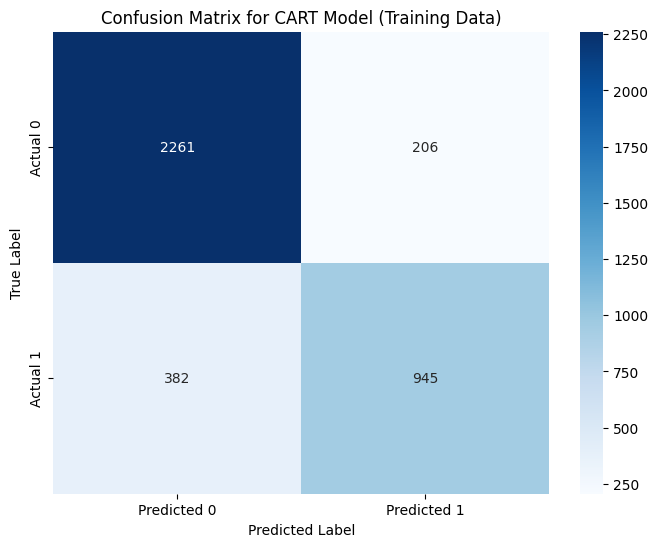

CART Model Performance (Training Data):
Accuracy: 0.8450
Precision: 0.8210
Recall: 0.7121
F1 Score: 0.7627


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Import precision_score, recall_score, and f1_score
from sklearn.metrics import precision_score, recall_score, f1_score


# ... (rest of your code) ...

# Predict on the training data
y_pred_cart = cart_model.predict(X_train)

# Create the confusion matrix
cm_cart = confusion_matrix(y_train, y_pred_cart)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CART Model (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate evaluation metrics
accuracy_cart = accuracy_score(y_train, y_pred_cart)
precision_cart = precision_score(y_train, y_pred_cart) # Now precision_score is defined
recall_cart = recall_score(y_train, y_pred_cart)  # Now recall_score is defined
f1_cart = f1_score(y_train, y_pred_cart)  # Now f1_score is defined

print(f"CART Model Performance (Training Data):")
print(f"Accuracy: {accuracy_cart:.4f}")
print(f"Precision: {precision_cart:.4f}")
print(f"Recall: {recall_cart:.4f}")
print(f"F1 Score: {f1_cart:.4f}")